In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

image shape: (700, 467)


Text(0.5, 1.0, 'Original Image')

<Figure size 640x480 with 0 Axes>

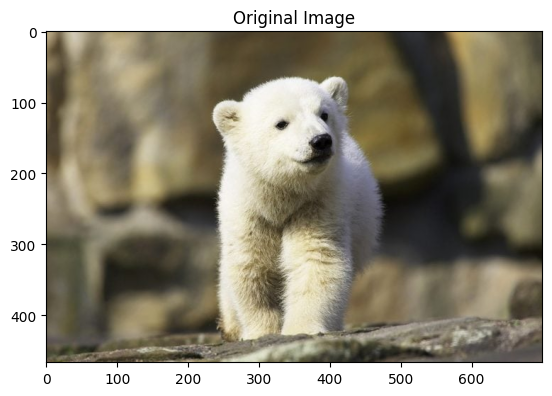

In [2]:
image_path = '/content/bear.jpg'
image = Image.open(image_path)

print("image shape:",image.size)
plt.figure()
plt.figure()
plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Gray Image')

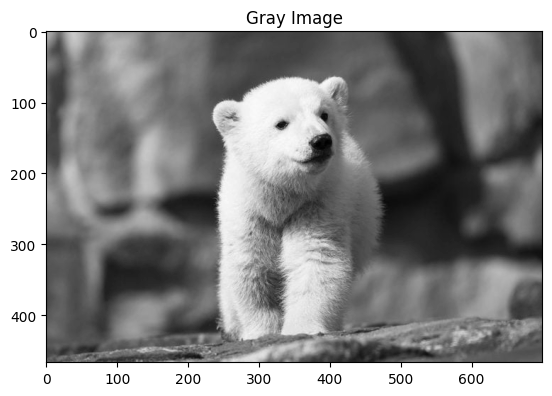

In [3]:
grayImage = image.convert('L')
plt.figure()
plt.imshow(grayImage, cmap='gray')
plt.title('Gray Image')

In [4]:
inputImage = np.array(grayImage, dtype=np.float64)
h, w = inputImage.shape
print("height:",h,"width:",w)

height: 467 width: 700


Text(0.5, 1.0, 'Gray Image')

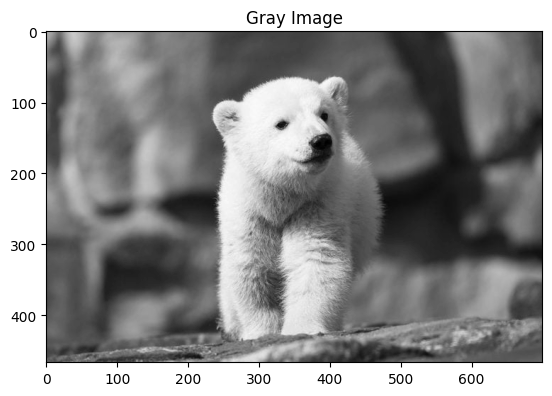

In [5]:
grayImage = image.convert('L')
plt.figure()
plt.imshow(inputImage, cmap='gray')
plt.title('Gray Image')

### 2. Implement both the Floyd-Steinberg and Jarvis-Judice-Ninke dithering algorithms on the image in either Python or MATLAB, then compare the results obtained from each method.

In [6]:
def floydSteinbergDithering(i, j, h, w, image, error):
    if i + 1 < h:
        image[i + 1, j] += error * 7 / 16
    if j + 1 < w:
        image[i, j + 1] += error * 5 / 16
    if i - 1 >= 0 and j + 1 < w:
        image[i - 1, j + 1] += error * 3 / 16
    if i + 1 < h and j + 1 < w:
        image[i + 1, j + 1] += error * 1 / 16
    return image

In [7]:
def jarvisJudiceNinke(i, j, h, w, image, error):
    if i + 1 < h:
        image[i + 1, j] += error * 7 / 48
        if j + 1 < w:
            image[i + 1, j + 1] += error * 5 / 48
        if j - 1 >= 0:
            image[i + 1, j - 1] += error * 3 / 48
    if i + 2 < h:
        image[i + 2, j] += error * 5 / 48
        if j + 1 < w:
            image[i + 2, j + 1] += error * 3 / 48
        if j - 1 >= 0:
            image[i + 2, j - 1] += error * 1 / 48
    if j + 1 < w:
        image[i, j + 1] += error * 5 / 48
    if j - 1 >= 0:
        image[i, j - 1] += error * 3 / 48
    return image

In [8]:
def filter(image, colorMapSize, filterType):
    resultImage = np.zeros_like(image)
    colorMap = np.linspace(0, 255, colorMapSize)
    h, w = image.shape

    for i in tqdm(range(h)):
        for j in range(w):
            inputPixel = image[i, j]
            resultPixel = colorMap[np.abs(colorMap - inputPixel).argmin()]
            resultImage[i, j] = resultPixel
            error = inputPixel - resultPixel

            if filterType == 'Floyd-Steinberg':
                image = floydSteinbergDithering(i, j, h, w, image, error)
            elif filterType == 'Jarvis-Judice-Ninke':
                image = jarvisJudiceNinke(i, j, h, w, image, error)

    resultImage = np.clip(resultImage, 0, 255).astype(np.uint8)
    return resultImage

100%|██████████| 467/467 [00:04<00:00, 104.64it/s]


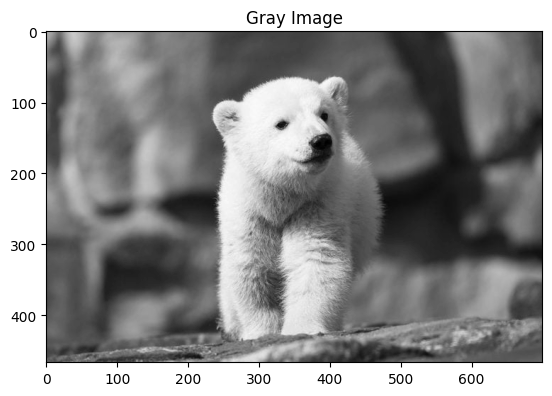

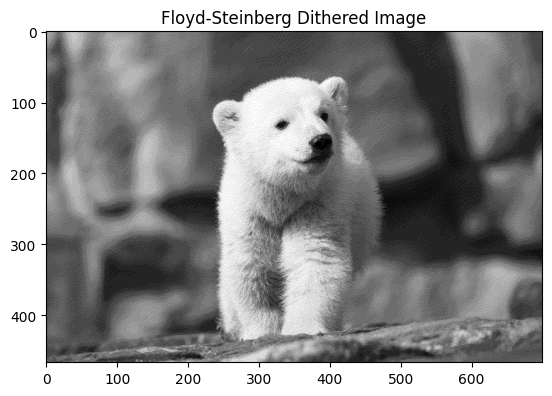

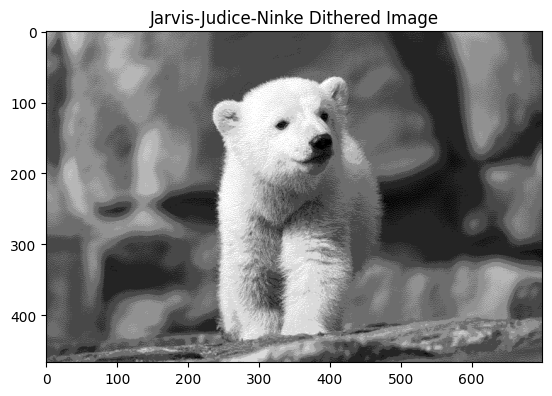

In [9]:
floydSteinberg = filter(inputImage.copy(),8,'Floyd-Steinberg')
jarvisJudiceNinke = filter(inputImage.copy(),8,'Jarvis-Judice-Ninke')

plt.figure()
plt.imshow(inputImage, cmap='gray')
plt.title('Gray Image')
plt.show()

plt.figure()
plt.imshow(floydSteinberg, cmap='gray')
plt.title('Floyd-Steinberg Dithered Image')
plt.show()

plt.figure()
plt.imshow(jarvisJudiceNinke, cmap='gray')
plt.title('Jarvis-Judice-Ninke Dithered Image')
plt.show()

**Floyd-Steinberg Dithering:** This method distributes the quantization error to neighboring pixels, producing a smoother and more visually pleasing result.

**Jarvis-Judice-Ninke Dithering:** Similar to Floyd-Steinberg, but uses a different error diffusion pattern, potentially resulting in slightly different artifacts.

## 3. Explain what a Kuwahara filter is, and apply it to the image using either Python or MATLAB to demonstrate its effect.

**Kuwahara filter :**

Kuwahara filter is a filters that remove noise while preserving edges by calculating the mean and variance of pixel values in overlapping regions. It is a non-linear smoothing filter.

**Applications :**
1. Image Restoration
2. Artistic Effects

In [10]:
def kuwaharaFilter(image, k=7):
  paddedImage = np.pad(image, (k // 2, k // 2), mode='symmetric')
  resultImage = np.zeros_like(image)
  h, w = image.shape

  for i in tqdm(range(h)):
      for j in range(w):
        q1 = paddedImage[i:i+k, j:j+k]
        q2 = paddedImage[i:i+k, j+k:j+2*k]
        q3 = paddedImage[i+k:i+2*k, j:j+k]
        q4 = paddedImage[i+k:i+2*k, j+k:j+2*k]
        regions = [q1, q2, q3, q4]
        means,variances = [], []
        for region in regions:
            if region.size > 0:
                means.append(np.mean(region))
                variances.append(np.var(region))
            else:
                means.append(0)
                variances.append(0)

        resultImage[i, j] = means[np.argmin(variances)]

  resultImage = np.clip(resultImage, 0, 255).astype(np.uint8)
  return resultImage

100%|██████████| 467/467 [01:03<00:00,  7.36it/s]


Text(0.5, 1.0, 'Kuwahara Filter k=5')

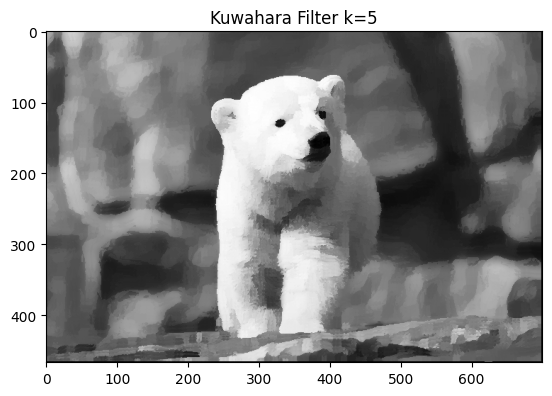

In [11]:
kuwaharaFilter5 = kuwaharaFilter(inputImage.copy(), k=5)

plt.figure()
plt.imshow(kuwaharaFilter5, cmap='gray')
plt.title('Kuwahara Filter k=5')

100%|██████████| 467/467 [01:03<00:00,  7.33it/s]


Text(0.5, 1.0, 'Kuwahara Filter k=7')

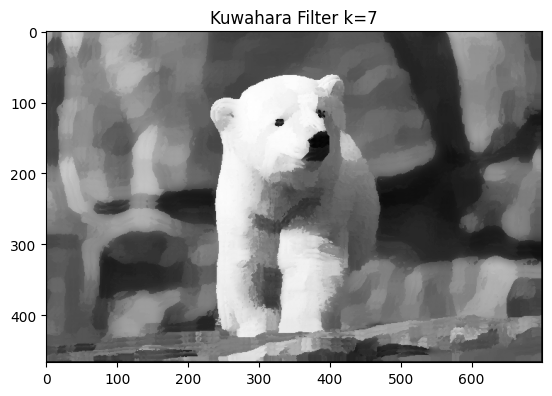

In [12]:
kuwaharaFilter7 = kuwaharaFilter(inputImage.copy(), k=7)

plt.figure()
plt.imshow(kuwaharaFilter7, cmap='gray')
plt.title('Kuwahara Filter k=7')

100%|██████████| 467/467 [01:03<00:00,  7.40it/s]


Text(0.5, 1.0, 'Kuwahara Filter k=9')

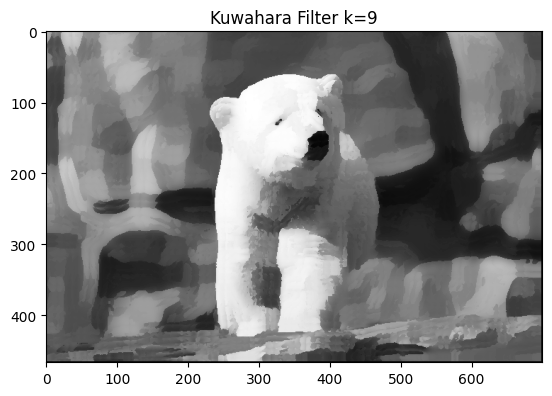

In [13]:
kuwaharaFilter9 = kuwaharaFilter(inputImage.copy(), k=9)
plt.figure()
plt.imshow(kuwaharaFilter9, cmap='gray')
plt.title('Kuwahara Filter k=9')

## 4. Take any image and apply the Fourier Transform to this image and the following filters:( Python or MATLAB)


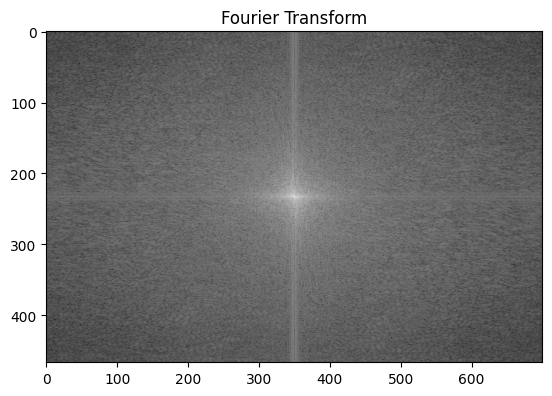

In [14]:
fourierTransformImage = np.fft.fft2(inputImage.copy())
fourierTransformShiftImage=np.fft.fftshift(fourierTransformImage)
magnitudeSpectrum = np.log(np.abs(fourierTransformShiftImage) + 1)

plt.figure()
plt.imshow(magnitudeSpectrum, cmap='gray')
plt.title('Fourier Transform')
plt.show()

In [15]:
def fourierTransformFilter(h, w, ffts, filter_type,sigma, n=3):
    x = np.arange(w)
    y = np.arange(h)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt((X - w / 2) ** 2 + (Y - h / 2) ** 2)

    if filter_type == "butterworth":
        H = 1 / (1 + (D / sigma) ** (2 * n))
    if filter_type == "gaussian":
        H = np.exp(-(D ** 2) / (2 * (sigma ** 2)))

    filterImage = ffts * H
    filterInverseShiftImage = np.fft.ifftshift(filterImage)
    filterInverseImage = np.fft.ifft2(filterInverseShiftImage)
    return np.abs(filterInverseImage)

**(b) Butterworth filters**


Text(0.5, 1.0, 'Butterworth Inverse Filtered')

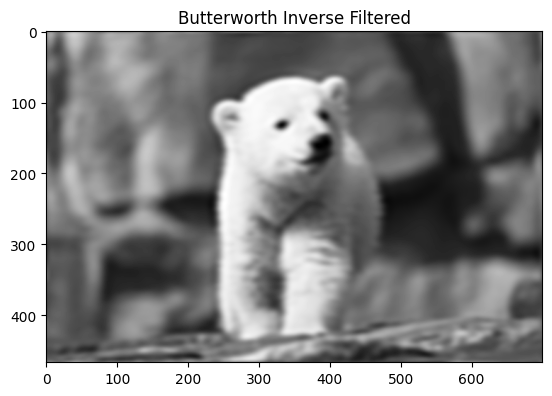

In [16]:
butterWorthInverseImage=fourierTransformFilter(h, w, fourierTransformShiftImage, "butterworth",40)
plt.figure()
plt.imshow(butterWorthInverseImage, cmap='gray')
plt.title('Butterworth Inverse Filtered')

**(c) Gaussian filters**

Text(0.5, 1.0, 'Gaussian Inverse Filtered')

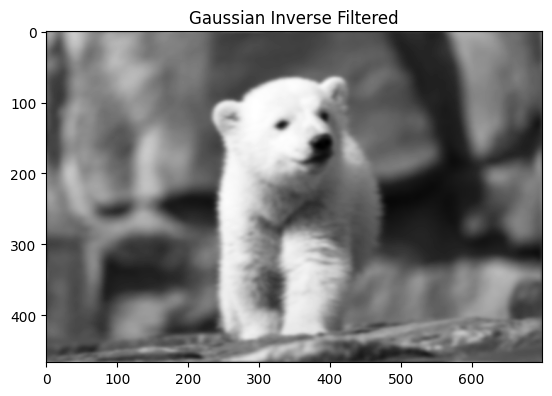

In [17]:
gaussianInverseImage=fourierTransformFilter(h, w, fourierTransformShiftImage, "gaussian",40)
plt.figure()
plt.imshow(gaussianInverseImage, cmap='gray')
plt.title('Gaussian Inverse Filtered')